In [1]:
import numpy as np
import scipy as sp

import matplotlib as mpl
from matplotlib import pyplot as plt
from adjustText import adjust_text
from statannot import add_stat_annotation

import pandas as pd
import seaborn as sns
import os
%matplotlib inline

In [2]:
def set_aspect_ratio(ax):
    
    """
    helper function to make square axes with equal x and y ranges
    """
    
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    both_min = np.min([xmin, ymin])
    both_max = np.max([xmax, ymax])
    ax.set_xlim((both_min, both_max))
    ax.set_ylim((both_min, both_max))
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    ax.set_aspect(abs(x1-x0)/abs(y1-y0))
    
    return ax
    
def same_ticks(ax):
    
    # Make ticks the same
    ax.set_xticks(ax.get_yticks())
    ax.set_xticklabels([aa.get_text() for aa in ax.get_yticklabels()])
    
    return ax

def draw_id_line(ax, color='gray', linestyle='--'):
    """
    helper function to draw an identity line (where y = x) on a graph
    """
    
    line = mpl.lines.Line2D([0, 1], [0, 1], color=color, linestyle=linestyle)
    transform = ax.transAxes
    line.set_transform(transform)
    ax.add_line(line)
    
    return ax

In [5]:
data_dir = '../results/'

## Plot whole-run results

In [7]:
behav_list = ["cognPC1", "emotPC1"]

clip_list = ["REST1", "MOVIE1", "MOVIE2", "REST4", "MOVIE3", "MOVIE4"]

all_files = os.listdir(data_dir)
files = []
for file in all_files:
    if any(behav in file for behav in behav_list) and any(clip in file for clip in clip_list) and 'trs' not in file:
        files.append(file)
        
print(len(files))
print(len(all_files))

24
156


In [8]:
attributes = ["clip", "behav", "gsr", "zscore", "tail", "metric"]

data = []

for f,file in enumerate(files):
    print("doing file {} of {}".format(f, len(files)))
    r_vals = np.loadtxt(data_dir+file)
    
    meta_data = []
    for attribute in attributes:
        this_attribute = file.split(attribute + '-')[1].split('_')[0].split('.')[0]
        meta_data.append(np.tile(this_attribute, len(r_vals)))
    
    if 'RAND' in file:
        meta_data.append(np.tile(True, len(r_vals)))
    if 'RAND' not in file:
        meta_data.append(np.tile(False, len(r_vals)))
        
    # Do session stuff
    if any(run in file for run in ["REST1", "MOVIE1", "MOVIE2"]):
        meta_data.append(np.tile("1", len(r_vals)))
    if any(run in file for run in ["REST4", "MOVIE3", "MOVIE4"]):
        meta_data.append(np.tile("2", len(r_vals)))
    if any(run in file for run in ["REST2", "REST3"]):
        meta_data.append(np.tile("NaN"), len(r_vals))
        
    meta_data.append(r_vals)
    data.append(list(zip(*meta_data)))

data = [item for sublist in data for item in sublist]
columns = attributes + ['RAND', "session", "r_val"]
df = pd.DataFrame(data=data, columns=columns)

doing file 0 of 24
doing file 1 of 24
doing file 2 of 24
doing file 3 of 24
doing file 4 of 24
doing file 5 of 24
doing file 6 of 24
doing file 7 of 24
doing file 8 of 24
doing file 9 of 24
doing file 10 of 24
doing file 11 of 24
doing file 12 of 24
doing file 13 of 24
doing file 14 of 24
doing file 15 of 24
doing file 16 of 24
doing file 17 of 24
doing file 18 of 24
doing file 19 of 24
doing file 20 of 24
doing file 21 of 24
doing file 22 of 24
doing file 23 of 24


In [10]:
for col in df.columns:
    print(col, df[col].unique())

clip ['MOVIE2' 'MOVIE3' 'REST4' 'MOVIE1' 'MOVIE4' 'REST1']
behav ['emotPC1' 'cognPC1']
gsr ['1']
zscore ['0']
tail ['glm']
metric ['spearman']
RAND [False  True]
session ['1' '2']
r_val [0.11502531 0.10571649 0.16440018 ... 0.17632401 0.17545895 0.12496148]


In [11]:
my_palette = {"REST1": "tab:gray", 
              "REST4": "tab:gray",
              "MOVIE1": "tab:purple",
              "MOVIE2": "tab:purple",
              "MOVIE3": "tab:purple",
              "MOVIE4": "tab:purple",
             }

REST1 : 10000 rand, 100 obs
Median r = 0.10, p = 0.19
MOVIE1 : 9998 rand, 100 obs
Median r = 0.18, p = 0.049
MOVIE2 : 10000 rand, 100 obs
Median r = 0.13, p = 0.12
REST4 : 10000 rand, 100 obs
Median r = -0.06, p = 0.7
MOVIE3 : 10000 rand, 100 obs
Median r = 0.04, p = 0.38
MOVIE4 : 10000 rand, 100 obs
Median r = -0.18, p = 0.93
Performing Mann-Whitney U test on pair: ('MOVIE1', 'REST1') u=9699.00 f=0.97 p-value=2e-30
Performing Mann-Whitney U test on pair: ('MOVIE2', 'REST1') u=8277.00 f=0.83 p-value=1e-15
Performing Mann-Whitney U test on pair: ('MOVIE2', 'MOVIE1') u=8067.50 f=0.81 p-value=7e-14
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

REST1 v.s. MOVIE1: Custom statistical test, P_val:1.658e-30
MOVIE1 v.s. MOVIE2: Custom statistical test, P_val:6.687e-14
REST1 v.s. MOVIE2: Custom statistical test, P_val:1.187e-15
Performing Mann-Whitney U test on pair: ('MOVIE3', '

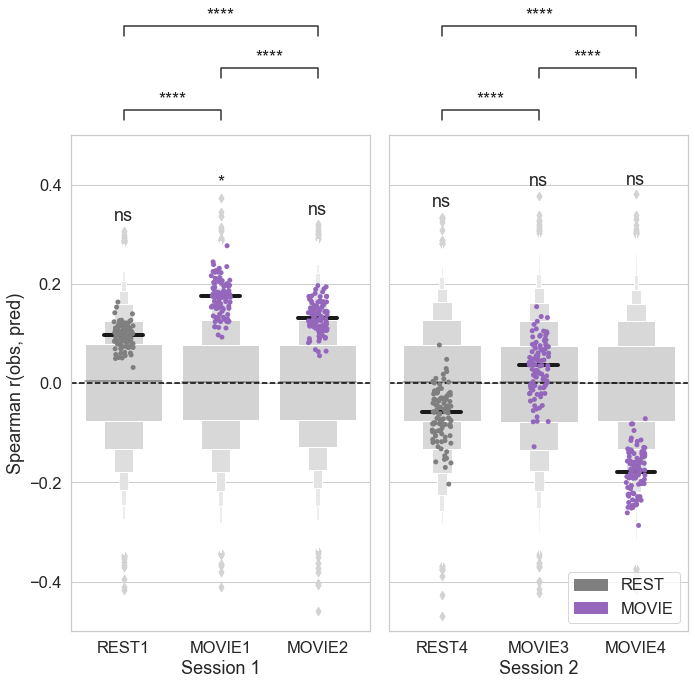

In [14]:
save_fig = False

params = {
    "metric": "spearman",
    "tail": "glm",
    "zscore": "0",
    "gsr": "1",
    "behav": "emotPC1"
}

add_stat_annot = True
p_val_method = 'median'
add_median_bar = True

filename = ''.join(["WholeRunResults_behav-", params["behav"], 
                                     "_gsr-", params["gsr"],
                                     "_zscore-", params["zscore"],
                                    "_metric-", params["metric"],
                                    "_tail-", params["tail"],
                    ".jpg"
                   ])

sns.set(font_scale=1.5, style="whitegrid")
fig, (ax1, ax2) = plt.subplots(1,2, sharex=False, sharey=True, figsize=(10,10))

# ---------------------------------------------------------------------------------------------------------------
# Do session 1
g1_rand = sns.boxenplot(data=df[(df["metric"]==params["metric"])
                        & (df["tail"]==params["tail"])
                        & (df["zscore"]==params["zscore"])
                        & (df["gsr"]==params["gsr"]) 
                        & (df["behav"] ==params["behav"])
                        & (df["RAND"] ==True)
                        & (df["session"] =="1")
                        ], 
                x="clip", order = ["REST1", "MOVIE1", "MOVIE2"],
                y="r_val", 
                color="lightgray",
                ax=ax1
               )

g1_obs = sns.stripplot(data=df[(df["metric"]==params["metric"])
                        & (df["tail"]==params["tail"])
                        & (df["zscore"]==params["zscore"])
                        & (df["gsr"]==params["gsr"]) 
                        & (df["behav"] ==params["behav"])
                        & (df["RAND"] ==False)
                        & (df["session"] =="1")
                        ], 
            x="clip", order = ["REST1", "MOVIE1", "MOVIE2"],
            y="r_val", 
            ax=ax1,
            palette=my_palette,
               )

# ---------------------------------------------------------------------------------------------------------------
# Do session 2
g2_rand = sns.boxenplot(data=df[(df["metric"]==params["metric"])
                        & (df["tail"]==params["tail"])
                        & (df["zscore"]==params["zscore"])
                        & (df["gsr"]==params["gsr"]) 
                        & (df["behav"] ==params["behav"])
                        & (df["RAND"] ==True)
                        & (df["session"] =="2")
                        ], 
                x="clip", order = ["REST4", "MOVIE3", "MOVIE4"],
                y="r_val", 
                color="lightgray",
                ax=ax2
               )

g2_obs = sns.stripplot(data=df[(df["metric"]==params["metric"])
                        & (df["tail"]==params["tail"])
                        & (df["zscore"]==params["zscore"])
                        & (df["gsr"]==params["gsr"]) 
                        & (df["behav"] ==params["behav"])
                        & (df["RAND"] ==False)
                        & (df["session"] =="2")
                        ], 
            x="clip", order = ["REST4", "MOVIE3", "MOVIE4"],
            y="r_val", 
            ax=ax2,
            palette=my_palette,
               )

ax1.set_ylim(-0.5, 0.5)
ax2.set_ylim(-0.5, 0.5)

# ---------------------------------------------------------------------------------------------------------------
if add_stat_annot is True:
    
    for ax in [ax1, ax2]:
        
        # Add p-values for individual runs vs their null distributions
        for tick, text in zip(ax.get_xticks(), ax.get_xticklabels()):
            clip = text.get_text()

            obs = df[(df["clip"]==clip)
                & (df["metric"]==params["metric"])
                    & (df["tail"]==params["tail"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
                    & (df["RAND"] ==False)
               ]["r_val"]

            # calculate p-value and write it above
            perm =  df[(df["metric"]==params["metric"])
                    & (df["tail"]==params["tail"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
                    & (df["RAND"] ==True)
                    & (df["clip"] ==clip)
                    ]["r_val"]
            
            if p_val_method =='median':
                p = ((perm > obs.median()).sum()+1)/(len(perm)+1)
                # annot = ''.join(["p=" + "{:.1g}".format(p_val)])
            elif p_val_method =='mw':
                stat, p = calc_pval(df, params, clip)
            elif p_val_method =='ttest':
                stat, p = sp.stats.ttest_ind(obs,perm)
                if stat < 0:
                    p = 1
            
            if 5.00e-02 < p <= 1.00e+00:
                annot = 'ns' 
            elif 1.00e-02 < p <= 5.00e-02:
                annot = '*'
            elif 1.00e-03 < p <= 1.00e-02:
                annot = '**'
            elif 1.00e-04 < p <= 1.00e-03:
                annot = '***'
            elif p <= 1.00e-04:
                annot = '****'
                
            max_val = df[(df["clip"]==clip)
                & (df["metric"]==params["metric"])
                    & (df["tail"]==params["tail"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
               ].r_val.max()

            ax.annotate(annot, xy=(tick, max_val+0.02), ha='center')
            print(clip, ": {} rand, {} obs".format(len(perm), len(obs)))
            print("Median r = {:.2f}, p = {:.2g}".format(np.median(obs), p))
            
# Add p-values for comparing two runs
ax = ax1
order = ["REST1", "MOVIE1", "MOVIE2"]
box_pairs = [("MOVIE1", "REST1"), ("MOVIE2", "REST1"), ("MOVIE2", "MOVIE1")]
test_short_name = 't-test'
pvalues = []
for pair in box_pairs:
    data1 = df[(df["clip"]==pair[0])
                & (df["metric"]==params["metric"])
                    & (df["tail"]==params["tail"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
                    & (df["RAND"] ==False)]["r_val"]
    data2 = df[(df["clip"]==pair[1])
                & (df["metric"]==params["metric"])
                    & (df["tail"]==params["tail"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
                    & (df["RAND"] ==False)]["r_val"]
    if data1.median() > data2.median(): # need to make sure the so that higher U means more significant (to get f [effect size measure])
        u, p = sp.stats.mannwhitneyu(data1,data2, alternative='two-sided')
    elif data2.median() > data1.median():
        u, p = sp.stats.mannwhitneyu(data2,data1, alternative='two-sided')
    f = u/(len(data1)*len(data2))
    print("Performing Mann-Whitney U test on pair:",
          pair, "u={:.2f} f={:.2f} p-value={:.1g}".format(u, f, p))
    pvalues.append(p)
    
test_results = add_stat_annotation(ax, data=df[(df["metric"]==params["metric"])
                    & (df["tail"]==params["tail"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
                    & (df["RAND"] ==False)], 
                            x = "clip", y= "r_val",
                              order=order,
                              box_pairs=box_pairs,
                              perform_stat_test=False, pvalues=pvalues,
                              test_short_name=test_short_name,
                              text_format='star', loc='outside',
                              )

# Add p-values for comparing two runs
ax = ax2
order = ["REST4", "MOVIE3", "MOVIE4"]
box_pairs = [("MOVIE3", "REST4"), ("MOVIE4", "REST4"), ("MOVIE3", "MOVIE4")]
test_short_name = 't-test'
pvalues = []
for pair in box_pairs:
    data1 = df[(df["clip"]==pair[0])
                & (df["metric"]==params["metric"])
                    & (df["tail"]==params["tail"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
                    & (df["RAND"] ==False)]["r_val"]
    data2 = df[(df["clip"]==pair[1])
                & (df["metric"]==params["metric"])
                    & (df["tail"]==params["tail"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
                    & (df["RAND"] ==False)]["r_val"]
    if data1.median() > data2.median(): # need to make sure the so that higher U means more significant (to get f [effect size measure])
        u, p = sp.stats.mannwhitneyu(data1,data2, alternative='two-sided')
    elif data2.median() > data1.median():
        u, p = sp.stats.mannwhitneyu(data2,data1, alternative='two-sided')
    f = u/(len(data1)*len(data2))
    print("Performing Mann-Whitney U test on pair:",
          pair, "u={:.2f} f={:.2f} p-value={:.1g}".format(u, f, p))
    pvalues.append(p)
    
test_results = add_stat_annotation(ax, data=df[(df["metric"]==params["metric"])
                    & (df["tail"]==params["tail"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
                    & (df["RAND"] ==False)], 
                            x = "clip", y= "r_val",
                              order=order,
                              box_pairs=box_pairs,
                              perform_stat_test=False, pvalues=pvalues,
                              test_short_name=test_short_name,
                              text_format='star', loc='outside',
                              )
# ---------------------------------------------------------------------------------------------------------------
median_width = 0.4

if add_median_bar is True:
    for ax in [ax1, ax2]:
        for tick, text in zip(ax.get_xticks(), ax.get_xticklabels()):
            clip = text.get_text()  # "X" or "Y"
            
            # calculate the median value for all replicates of either X or Y
            median_val = df[(df["clip"]==clip)
                            & (df["metric"]==params["metric"])
                                & (df["tail"]==params["tail"])
                                & (df["zscore"]==params["zscore"])
                                & (df["gsr"]==params["gsr"]) 
                                & (df["behav"] ==params["behav"])
                                & (df["RAND"] ==False)
                           ].r_val.median()

            # plot horizontal lines across the column, centered on the tick
            ax.plot([tick-median_width/2, tick+median_width/2], [median_val, median_val],
                    lw=4, color='k')

# ---------------------------------------------------------------------------------------------------------------            
for ax in [ax1, ax2]:
    ax.axhline(y=0, ls='--', c='black')
#    [t.set_color(i) for (i,t) in zip(['tab:gray','tab:blue','tab:blue'],ax.xaxis.get_ticklabels())]

ax1.set_xlabel("Session 1")
ax2.set_xlabel("Session 2")
ax1.set_ylabel(params["metric"].capitalize() + " r(obs, pred)")
ax2.yaxis.label.set_visible(False)

import matplotlib.patches as mpatches

rest_patch = mpatches.Patch(color='tab:gray', label='REST')
movie_patch = mpatches.Patch(color='tab:purple', label='MOVIE')

ax2.legend(handles=[rest_patch, movie_patch], loc='lower right')

fig.tight_layout()
if save_fig:
    plt.savefig(filename, dpi=300)

## Plot single-clip results

In [15]:
behav_list = ["cognPC1", "emotPC1"]

# Clips with > 143 TRs
clip_list = ["twomen", "bridgeville", "pockets",
              "inception", "socialnet", "oceans",
              "flower", "hotel", "garden", "dreary",
              "homealone", "brokovich", "starwars",
            ]

all_files = os.listdir(data_dir)
files = []
for file in all_files:
    if any(behav in file for behav in behav_list) and any(clip in file for clip in clip_list) and 'trs-143' in file:
        files.append(file)
        
        
print(len(files))
print(len(all_files))

52
156


In [16]:
attributes = ["clip", "behav", "gsr", "zscore", "tail", "metric"]

data = []

for f,file in enumerate(files):
    print("doing file {} of {}".format(f, len(files)))
    r_vals = np.loadtxt(data_dir+file)
    
    meta_data = []
    for attribute in attributes:
        this_attribute = file.split(attribute + '-')[1].split('_')[0].split('.')[0]
        meta_data.append(np.tile(this_attribute, len(r_vals)))
    
    if 'RAND' in file:
        meta_data.append(np.tile(True, len(r_vals)))
    if 'RAND' not in file:
        meta_data.append(np.tile(False, len(r_vals)))
    
    # Do session stuff
    if any(clip in file for clip in ["twomen", "bridgeville", "pockets", "overcome", "testretest1"]):
        meta_data.append(np.tile("1", len(r_vals)))
    if any(clip in file for clip in ["inception", "socialnet", "oceans", "testretest2"]):
        meta_data.append(np.tile("2", len(r_vals)))
    if any(clip in file for clip in ["flower", "hotel", "garden", "dreary", "testretest3"]):
        meta_data.append(np.tile("3", len(r_vals)))
    if any(clip in file for clip in ["homealone", "brokovich", "starwars", "testretest4"]):
        meta_data.append(np.tile("4", len(r_vals)))
    
    meta_data.append(r_vals)
    data.append(list(zip(*meta_data)))

data = [item for sublist in data for item in sublist]
columns = attributes + ['RAND', "run", "r_val"]
df = pd.DataFrame(data=data, columns=columns)

doing file 0 of 52
doing file 1 of 52
doing file 2 of 52
doing file 3 of 52
doing file 4 of 52
doing file 5 of 52
doing file 6 of 52
doing file 7 of 52
doing file 8 of 52
doing file 9 of 52
doing file 10 of 52
doing file 11 of 52
doing file 12 of 52
doing file 13 of 52
doing file 14 of 52
doing file 15 of 52
doing file 16 of 52
doing file 17 of 52
doing file 18 of 52
doing file 19 of 52
doing file 20 of 52
doing file 21 of 52
doing file 22 of 52
doing file 23 of 52
doing file 24 of 52
doing file 25 of 52
doing file 26 of 52
doing file 27 of 52
doing file 28 of 52
doing file 29 of 52
doing file 30 of 52
doing file 31 of 52
doing file 32 of 52
doing file 33 of 52
doing file 34 of 52
doing file 35 of 52
doing file 36 of 52
doing file 37 of 52
doing file 38 of 52
doing file 39 of 52
doing file 40 of 52
doing file 41 of 52
doing file 42 of 52
doing file 43 of 52
doing file 44 of 52
doing file 45 of 52
doing file 46 of 52
doing file 47 of 52
doing file 48 of 52
doing file 49 of 52
doing file

In [17]:
for col in df.columns:
    print(col, df[col].unique())

clip ['flower' 'bridgeville' 'garden' 'socialnet' 'oceans' 'dreary' 'pockets'
 'homealone' 'inception' 'starwars' 'brokovich' 'twomen' 'hotel']
behav ['cognPC1' 'emotPC1']
gsr ['1']
zscore ['0']
tail ['glm']
metric ['spearman']
RAND [ True False]
run ['3' '1' '2' '4']
r_val [ 0.13848778 -0.06151662 -0.02032798 ...  0.17569007  0.12106978
  0.18039842]


In [18]:
rename_dict = {
    "twomen": "two men",
    "oceans": "ocean's 11",
    "socialnet": "social net",
    "homealone": "home alone",
    "starwars": "star wars"
}

df["clip"].replace(rename_dict, inplace=True)

two men : 10000 rand, 100 obs
Median r = -0.01, p = 0.53
bridgeville : 10000 rand, 100 obs
Median r = -0.01, p = 0.54
pockets : 10000 rand, 100 obs
Median r = 0.22, p = 0.013
inception : 10000 rand, 100 obs
Median r = 0.09, p = 0.2
social net : 10000 rand, 100 obs
Median r = 0.24, p = 0.0098
ocean's 11 : 10000 rand, 100 obs
Median r = 0.22, p = 0.014
flower : 10000 rand, 100 obs
Median r = -0.06, p = 0.71
hotel : 10000 rand, 100 obs
Median r = -0.01, p = 0.54
garden : 10000 rand, 100 obs
Median r = -0.02, p = 0.58
dreary : 10000 rand, 100 obs
Median r = -0.18, p = 0.94
home alone : 10000 rand, 100 obs
Median r = 0.04, p = 0.36
brokovich : 10000 rand, 100 obs
Median r = 0.01, p = 0.46
star wars : 10000 rand, 100 obs
Median r = -0.07, p = 0.75


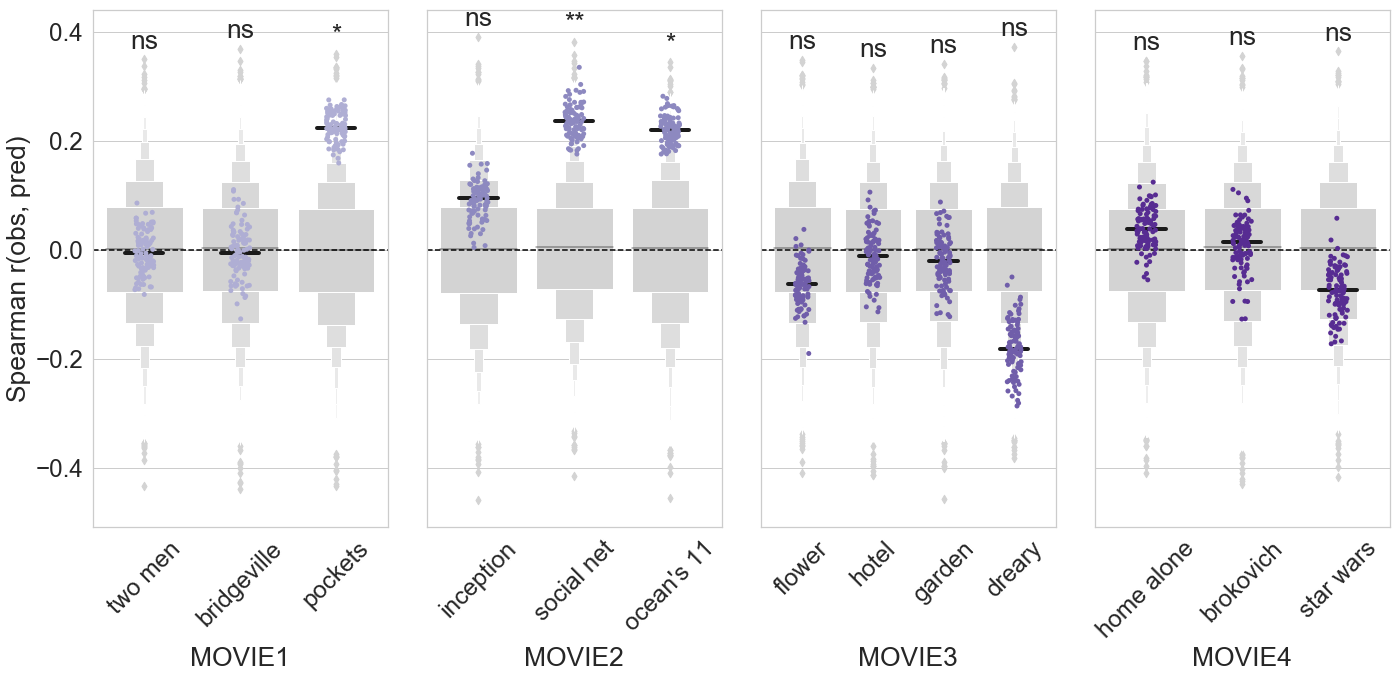

In [21]:
save_fig = False

params = {
    "metric": "spearman",
    "tail": "glm",
    "zscore": "0",
    "gsr": "1",
    "behav": "emotPC1"
}

add_stat_annot = True
p_val_method = 'median'
add_median_bar = True

filename = ''.join(["SingleClipResults_behav-", params["behav"], 
                                     "_gsr-", params["gsr"],
                                     "_zscore-", params["zscore"],
                                    "_metric-", params["metric"],
                                    "_tail-", params["tail"],
                    ".jpg"
                   ])


sns.set(font_scale=2.2, style="whitegrid")
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, sharex=False, sharey=True, figsize=(20,10))
color_palette="Purples"

# Do Run 1
g1_rand = sns.boxenplot(data=df[(df["metric"]==params["metric"])
                        & (df["tail"]==params["tail"])
                        & (df["zscore"]==params["zscore"])
                        & (df["gsr"]==params["gsr"]) 
                        & (df["behav"] ==params["behav"])
                        & (df["RAND"] ==True)
                        & (df["run"] =="1")
                        ], 
                x="clip", order = ["two men", "bridgeville", "pockets", "overcome", "testretest1"],
                y="r_val", 
                color="lightgray",
                ax=ax1
               )

g1_obs = sns.stripplot(data=df[(df["metric"]==params["metric"])
                        & (df["tail"]==params["tail"])
                        & (df["zscore"]==params["zscore"])
                        & (df["gsr"]==params["gsr"]) 
                        & (df["behav"] ==params["behav"])
                        & (df["RAND"] ==False)
                        & (df["run"] =="1")
                        ], 
            x="clip", order = ["two men", "bridgeville", "pockets"],
            y="r_val", 
            ax=ax1,
            color=sns.color_palette(color_palette)[2]               
            )

# Do Run 2
g2_rand = sns.boxenplot(data=df[(df["metric"]==params["metric"])
                        & (df["tail"]==params["tail"])
                        & (df["zscore"]==params["zscore"])
                        & (df["gsr"]==params["gsr"]) 
                        & (df["behav"] ==params["behav"])
                        & (df["RAND"] ==True)
                        & (df["run"] =="2")
                        ], 
                x="clip", order = ["inception", "social net", "ocean's 11"],
                y="r_val", 
                color="lightgray",
                ax=ax2
               )

g2_obs = sns.stripplot(data=df[(df["metric"]==params["metric"])
                        & (df["tail"]==params["tail"])
                        & (df["zscore"]==params["zscore"])
                        & (df["gsr"]==params["gsr"]) 
                        & (df["behav"] ==params["behav"])
                        & (df["RAND"] ==False)
                        & (df["run"] =="2")
                        ], 
            x="clip", order = ["inception", "social net", "ocean's 11"],
            y="r_val", 
            ax=ax2,
            color=sns.color_palette(color_palette)[3]               
            )

# Do Run 3
g3_rand = sns.boxenplot(data=df[(df["metric"]==params["metric"])
                        & (df["tail"]==params["tail"])
                        & (df["zscore"]==params["zscore"])
                        & (df["gsr"]==params["gsr"]) 
                        & (df["behav"] ==params["behav"])
                        & (df["RAND"] ==True)
                        & (df["run"] =="3")
                        ], 
                x="clip", order = ["flower", "hotel", "garden", "dreary"],
                y="r_val", 
                color="lightgray",
                ax=ax3
               )

g3_obs = sns.stripplot(data=df[(df["metric"]==params["metric"])
                        & (df["tail"]==params["tail"])
                        & (df["zscore"]==params["zscore"])
                        & (df["gsr"]==params["gsr"]) 
                        & (df["behav"] ==params["behav"])
                        & (df["RAND"] ==False)
                        & (df["run"] =="3")
                        ], 
            x="clip", order = ["flower", "hotel", "garden", "dreary"],
            y="r_val", 
            ax=ax3,
            color=sns.color_palette(color_palette)[4]               
            )

# Do Run 4
g4_rand = sns.boxenplot(data=df[(df["metric"]==params["metric"])
                        & (df["tail"]==params["tail"])
                        & (df["zscore"]==params["zscore"])
                        & (df["gsr"]==params["gsr"]) 
                        & (df["behav"] ==params["behav"])
                        & (df["RAND"] ==True)
                        & (df["run"] =="4")
                        ], 
                x="clip", order = ["home alone", "brokovich", "star wars"],
                y="r_val", 
                color="lightgray",
                ax=ax4
               )

g4_obs = sns.stripplot(data=df[(df["metric"]==params["metric"])
                        & (df["tail"]==params["tail"])
                        & (df["zscore"]==params["zscore"])
                        & (df["gsr"]==params["gsr"]) 
                        & (df["behav"] ==params["behav"])
                        & (df["RAND"] ==False)
                        & (df["run"] =="4")
                        ], 
            x="clip", order = ["home alone", "brokovich", "star wars"],
            y="r_val", 
            ax=ax4,
            color=sns.color_palette(color_palette)[5]               
            )

# ---------------------------------------------------------------------------------------------------------------
median_width = 0.4

if add_median_bar is True:
    for ax in [ax1, ax2, ax3, ax4]:
        for tick, text in zip(ax.get_xticks(), ax.get_xticklabels()):
            clip = text.get_text()  # "X" or "Y"
            
            # calculate the median value for all replicates of either X or Y
            median_val = df[(df["clip"]==clip)
                            & (df["metric"]==params["metric"])
                                & (df["tail"]==params["tail"])
                                & (df["zscore"]==params["zscore"])
                                & (df["gsr"]==params["gsr"]) 
                                & (df["behav"] ==params["behav"])
                                & (df["RAND"] ==False)
                           ].r_val.median()

            # plot horizontal lines across the column, centered on the tick
            ax.plot([tick-median_width/2, tick+median_width/2], [median_val, median_val],
                    lw=4, color='k')
# ------------------------------------------------------------------------------------------------------------

for ax in [ax1, ax2, ax3, ax4]:
    ax.axhline(y=0, ls='--', c='black')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    # ax.xaxis.label.set_visible(False)
    
# ax1.set_title("MOVIE1")
# ax2.set_title("MOVIE2")
# ax3.set_title("MOVIE3")
# ax4.set_title("MOVIE4")

ax1.set_xlabel("MOVIE1")
ax2.set_xlabel("MOVIE2")
ax3.set_xlabel("MOVIE3")
ax4.set_xlabel("MOVIE4")

ax1.set_ylabel(params["metric"].capitalize() + " r(obs, pred)")
for ax in [ax2, ax3, ax4]:
    ax.yaxis.label.set_visible(False)
    
# -----------------------------------------------------------------------------------------------------------
if add_stat_annot is True:
    
    for ax in [ax1, ax2, ax3, ax4]:
        
        # Add p-values for individual runs vs their null distributions
        for tick, text in zip(ax.get_xticks(), ax.get_xticklabels()):
            clip = text.get_text()

            obs = df[(df["clip"]==clip)
                & (df["metric"]==params["metric"])
                    & (df["tail"]==params["tail"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
                    & (df["RAND"] ==False)
               ]["r_val"]

            # calculate p-value and write it above
            perm =  df[(df["metric"]==params["metric"])
                    & (df["tail"]==params["tail"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
                    & (df["RAND"] ==True)
                    & (df["clip"] ==clip)
                    ]["r_val"]
            
            if p_val_method =='median':
                p = ((perm > obs.median()).sum()+1)/(len(perm)+1)
                # annot = ''.join(["p=" + "{:.1g}".format(p_val)])
            elif p_val_method =='mw':
                stat, p = calc_pval(df, params, clip)
            elif p_val_method =='ttest':
                stat, p = sp.stats.ttest_ind(obs,perm)
                if stat < 0:
                    p = 1
            
            if 5.00e-02 < p <= 1.00e+00:
                annot = 'ns' 
            elif 1.00e-02 < p <= 5.00e-02:
                annot = '*'
            elif 1.00e-03 < p <= 1.00e-02:
                annot = '**'
            elif 1.00e-04 < p <= 1.00e-03:
                annot = '***'
            elif p <= 1.00e-04:
                annot = '****'
                
            max_val = df[(df["clip"]==clip)
                & (df["metric"]==params["metric"])
                    & (df["tail"]==params["tail"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
               ].r_val.max()

            ax.annotate(annot, xy=(tick, max_val+0.02), ha='center')
            print(clip, ": {} rand, {} obs".format(len(perm), len(obs)))
            print("Median r = {:.2f}, p = {:.2g}".format(np.median(obs), p))
            
fig.align_xlabels()
fig.tight_layout()
if save_fig == True:
    plt.savefig(filename, dpi=300)

## Compare EMOT and COGN predictions

In [22]:
plt.rcParams.update({'font.size': 40})

In [23]:
params = {
    "metric": "spearman",
    "tail": "glm",
    "zscore": "0",
    "gsr": "1",
    "behav": "cognPC1"
}

cogn_median_val = df[(df["metric"]==params["metric"])
                    & (df["tail"]==params["tail"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
                    & (df["RAND"] ==False)
               ].groupby("clip", sort=False).r_val.median()

cogn_median_val

clip
ocean's 11     0.342261
dreary         0.040545
garden         0.182495
hotel          0.141923
inception      0.222143
brokovich      0.187331
star wars      0.211377
two men        0.180369
pockets        0.216468
home alone     0.198027
social net     0.379092
bridgeville    0.120825
flower         0.051353
Name: r_val, dtype: float64

In [24]:
params["behav"]="emotPC1"

emot_median_val = df[(df["metric"]==params["metric"])
                    & (df["tail"]==params["tail"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
                    & (df["RAND"] ==False)
               ].groupby("clip", sort=False).r_val.median()

emot_median_val

clip
pockets        0.223575
ocean's 11     0.220691
star wars     -0.073874
two men       -0.006423
dreary        -0.181328
garden        -0.020333
flower        -0.063442
inception      0.094674
bridgeville   -0.006565
brokovich      0.014734
social net     0.235419
home alone     0.038924
hotel         -0.011225
Name: r_val, dtype: float64

SpearmanrResult(correlation=0.8285714285714287, pvalue=0.04156268221574334)
(0.8257131392006977, 0.04291680378531096)


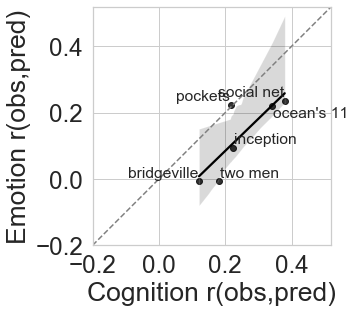

In [25]:
clips_of_interest = [
    "two men",
    "bridgeville",
    "pockets",
    "inception",
    "social net",
    "ocean's 11",
]

x = cogn_median_val[clips_of_interest]
y = emot_median_val[clips_of_interest]

fig, ax = plt.subplots(figsize=(5,5))
sns.set(font_scale=1.3, style='darkgrid')
sns.set_style("ticks")

with sns.axes_style("darkgrid"):
    # sns.scatterplot(x,y,ax=ax, color='black')
    sns.regplot(x, y, ax=ax, color='black')


ax.set_xlabel("Cognition r(obs,pred)")
ax.set_ylabel("Emotion r(obs,pred)")

labels = [ax.annotate(txt, (x[i], y[i])) for i,txt in enumerate(x.index)]

# Make everything square and draw identity line
set_aspect_ratio(ax)
draw_id_line(ax)
adjust_text(labels)

ax.set_yticks(ax.get_xticks()[:-1])
set_aspect_ratio(ax)

sns.set_style("whitegrid")
# sns.set_style("ticks")
print(sp.stats.spearmanr(x,y))
print(sp.stats.pearsonr(x,y))

fig.tight_layout()
plt.savefig('single_clip_cogn_vs_emotion_median_r.png', dpi=300)

In [38]:
# Save per-clip median accuracy for cognitive scores
cogn_median_val.to_csv('../data/cogn_median_val_trs-143.csv')

## Compare clips to matched rest blocks

In [27]:
behav_list = ["cognPC1", "emotPC1"]

# Clips with > 143 TRs
clip_list = ["twomen", "bridgeville", "pockets",
              "inception", "socialnet", "oceans",
              "flower", "hotel", "garden", "dreary",
              "homealone", "brokovich", "starwars",
            ]

all_files = os.listdir(data_dir)
files = []
for file in all_files:
    if any(behav in file for behav in behav_list) and any(clip in file for clip in clip_list) and 'trs' not in file and 'RAND' not in file:
        files.append(file)
        
print(len(files))
print(len(all_files))

52
192


In [28]:
files[:10]

['clip-starwars_behav-cognPC1_gsr-1_zscore-0_rthr-0.2_k-10_tail-glm_metric-spearman.txt',
 'clip-dreary_behav-emotPC1_gsr-1_zscore-0_rthr-0.2_k-10_tail-glm_metric-spearman.txt',
 'clip-starwars_behav-emotPC1_gsr-1_zscore-0_rthr-0.2_k-10_SameRestBlock_tail-glm_metric-spearman.txt',
 'clip-garden_behav-cognPC1_gsr-1_zscore-0_rthr-0.2_k-10_tail-glm_metric-spearman.txt',
 'clip-oceans_behav-emotPC1_gsr-1_zscore-0_rthr-0.2_k-10_tail-glm_metric-spearman.txt',
 'clip-oceans_behav-cognPC1_gsr-1_zscore-0_rthr-0.2_k-10_tail-glm_metric-spearman.txt',
 'clip-homealone_behav-cognPC1_gsr-1_zscore-0_rthr-0.2_k-10_SameRestBlock_tail-glm_metric-spearman.txt',
 'clip-twomen_behav-emotPC1_gsr-1_zscore-0_rthr-0.2_k-10_tail-glm_metric-spearman.txt',
 'clip-bridgeville_behav-cognPC1_gsr-1_zscore-0_rthr-0.2_k-10_SameRestBlock_tail-glm_metric-spearman.txt',
 'clip-garden_behav-cognPC1_gsr-1_zscore-0_rthr-0.2_k-10_SameRestBlock_tail-glm_metric-spearman.txt']

In [32]:
attributes = ["clip", "behav", "gsr", "zscore", "metric"]

data = []

for f,file in enumerate(files):
    print("doing file {} of {}".format(f, len(files)))
    r_vals = np.loadtxt(data_dir+file)
    r_vals = r_vals[:100]
    
    meta_data = []
    for attribute in attributes:
        this_attribute = file.split(attribute + '-')[1].split('_')[0].split('.')[0]
        meta_data.append(np.tile(this_attribute, len(r_vals)))
    
    if 'SameRestBlock' in file:
        meta_data.append(np.tile(True, len(r_vals)))
    if 'SameRestBlock' not in file:
        meta_data.append(np.tile(False, len(r_vals)))
        
    meta_data.append(r_vals)
    data.append(list(zip(*meta_data)))

data = [item for sublist in data for item in sublist]
columns = attributes + ["SameRestBlock", "r_val"]
df = pd.DataFrame(data=data, columns=columns)

doing file 0 of 52
doing file 1 of 52
doing file 2 of 52
doing file 3 of 52
doing file 4 of 52
doing file 5 of 52
doing file 6 of 52
doing file 7 of 52
doing file 8 of 52
doing file 9 of 52
doing file 10 of 52
doing file 11 of 52
doing file 12 of 52
doing file 13 of 52
doing file 14 of 52
doing file 15 of 52
doing file 16 of 52
doing file 17 of 52
doing file 18 of 52
doing file 19 of 52
doing file 20 of 52
doing file 21 of 52
doing file 22 of 52
doing file 23 of 52
doing file 24 of 52
doing file 25 of 52
doing file 26 of 52
doing file 27 of 52
doing file 28 of 52
doing file 29 of 52
doing file 30 of 52
doing file 31 of 52
doing file 32 of 52
doing file 33 of 52
doing file 34 of 52
doing file 35 of 52
doing file 36 of 52
doing file 37 of 52
doing file 38 of 52
doing file 39 of 52
doing file 40 of 52
doing file 41 of 52
doing file 42 of 52
doing file 43 of 52
doing file 44 of 52
doing file 45 of 52
doing file 46 of 52
doing file 47 of 52
doing file 48 of 52
doing file 49 of 52
doing file

In [34]:
df["clip"].replace(rename_dict, inplace=True)

for col in df.columns:
    print(col, df[col].unique())

clip ['star wars' 'dreary' 'garden' "ocean's 11" 'home alone' 'two men'
 'bridgeville' 'pockets' 'hotel' 'inception' 'social net' 'brokovich'
 'flower']
behav ['cognPC1' 'emotPC1']
gsr ['1']
zscore ['0']
metric ['spearman']
SameRestBlock [False  True]
r_val [0.20596742 0.15737618 0.19633942 ... 0.12690293 0.15418666 0.12950913]


two men : 100 movie, 100 rest
MW u = 7433.00, f = 0.74, p = 2.8e-09
bridgeville : 100 movie, 100 rest
MW u = 7487.00, f = 0.75, p = 1.2e-09
pockets : 100 movie, 100 rest
MW u = 9000.00, f = 0.90, p = 1.5e-22
inception : 100 movie, 100 rest
MW u = 7761.50, f = 0.78, p = 1.5e-11
social net : 100 movie, 100 rest
MW u = 10000.00, f = 1.00, p = 2.6e-34
ocean's 11 : 100 movie, 100 rest
MW u = 10000.00, f = 1.00, p = 2.6e-34
flower : 100 movie, 100 rest
MW u = 9907.00, f = 0.99, p = 4.1e-33
hotel : 100 movie, 100 rest
MW u = 9407.00, f = 0.94, p = 4.9e-27
garden : 100 movie, 100 rest
MW u = 8232.00, f = 0.82, p = 2.9e-15
dreary : 100 movie, 100 rest
MW u = 9991.00, f = 1.00, p = 3.4e-34
home alone : 100 movie, 100 rest
MW u = 9857.00, f = 0.99, p = 1.8e-32
brokovich : 100 movie, 100 rest
MW u = 7113.00, f = 0.71, p = 2.4e-07
star wars : 100 movie, 100 rest
MW u = 9696.00, f = 0.97, p = 1.8e-30


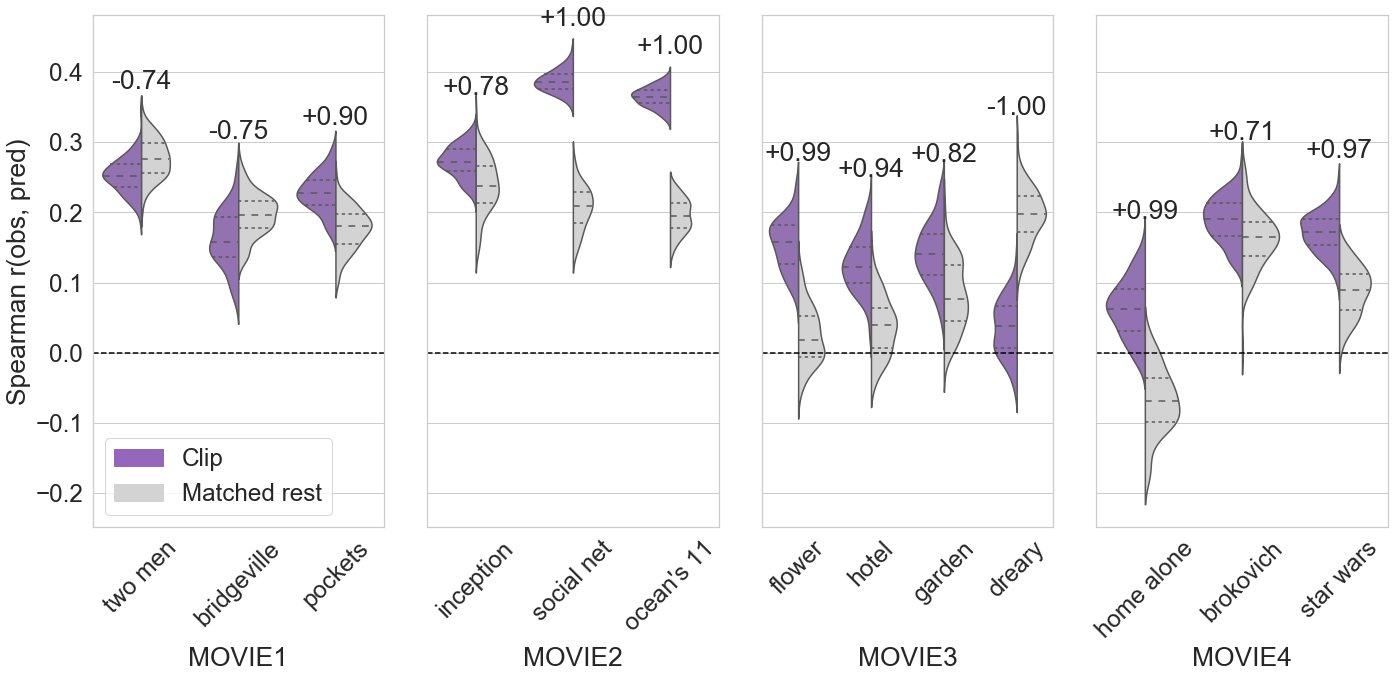

In [37]:
add_stat_annot = True

params = {
    "metric": "spearman",
    "zscore": "0",
    "gsr": "1",
    "behav": "cognPC1",
}

sns.set(font_scale=2.2, style="whitegrid")
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, sharex=False, sharey=True, figsize=(20,10))


# Do MOVIE1
ax = ax1
g1 = sns.violinplot(x="clip", y="r_val", order= ["two men", "bridgeville", "pockets"],
                   hue="SameRestBlock", split=True, inner="quart", 
                   palette={True: "lightgray", False:"tab:purple"},
                   data=df[(df["metric"]==params["metric"])
                        & (df["gsr"]==params["gsr"])
                        & (df["zscore"]==params["zscore"])
                        & (df["behav"] ==params["behav"])
                        ],
                   ax=ax)

# Do MOVIE2
ax = ax2
g2 = sns.violinplot(x="clip", y="r_val", order= ["inception", "social net", "ocean's 11"],
                   hue="SameRestBlock", split=True, inner="quart", 
                   palette={True: "lightgray", False:"tab:purple"},
                   data=df[(df["metric"]==params["metric"])
                        & (df["gsr"]==params["gsr"])
                        & (df["zscore"]==params["zscore"])
                        & (df["behav"] ==params["behav"])
                        ],
                   ax=ax)

# Do MOVIE3
ax = ax3
g3 = sns.violinplot(x="clip", y="r_val", order= ["flower", "hotel", "garden", "dreary"],
                   hue="SameRestBlock", split=True, inner="quart", 
                   palette={True: "lightgray", False:"tab:purple"},
                   data=df[(df["metric"]==params["metric"])
                        & (df["gsr"]==params["gsr"])
                        & (df["zscore"]==params["zscore"])
                        & (df["behav"] ==params["behav"])
                        ],
                   ax=ax)

# Do MOVIE4
ax = ax4
g4 = sns.violinplot(x="clip", y="r_val", order= ["home alone", "brokovich", "star wars"],
                   hue="SameRestBlock", split=True, inner="quart", 
                   palette={True: "lightgray", False:"tab:purple"},
                   data=df[(df["metric"]==params["metric"])
                        & (df["gsr"]==params["gsr"])
                        & (df["zscore"]==params["zscore"])
                        & (df["behav"] ==params["behav"])
                        ],
                   ax=ax)

# ------------------------------------------------------------------------------------------------------------
# Stats stuff
if add_stat_annot is True:
    
    for ax in [ax1, ax2, ax3, ax4]:
        
        # Add p-values for individual runs vs their null distributions
        for tick, text in zip(ax.get_xticks(), ax.get_xticklabels()):
            clip = text.get_text()

            movie = df[(df["clip"]==clip)
                & (df["metric"]==params["metric"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
                    & (df["SameRestBlock"] ==False)
               ]["r_val"]
            
            rest = df[(df["clip"]==clip)
                & (df["metric"]==params["metric"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
                    & (df["SameRestBlock"] ==True)
               ]["r_val"]
            
            if movie.median() > rest.median(): # need to make sure the so that higher U means more significant (to get f [effect size measure])
                u, p = sp.stats.mannwhitneyu(movie, rest, alternative='two-sided')
                sign = '+'
            elif rest.median() > movie.median():
                u, p = sp.stats.mannwhitneyu(rest, movie, alternative='two-sided')
                sign = '-'
            f = u/(len(rest)*len(movie))
                
            max_val = df[(df["clip"]==clip)
                & (df["metric"]==params["metric"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
               ].r_val.max()

            ax.annotate(sign+"{:.2f}".format(f), xy=(tick, max_val+0.03), ha='center')
            print(clip, ": {} movie, {} rest".format(len(movie), len(rest)))
            print("MW u = {:.2f}, f = {:.2f}, p = {:.2g}".format(u,f,p))
            
# ---------------------------------------------------------------------------------------------------------------
# Formatting stuff

for ax in [ax1, ax2, ax3, ax4]:
    ax.axhline(y=0, ls='--', c='black')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
ax1.set_xlabel("MOVIE1")
ax2.set_xlabel("MOVIE2")
ax3.set_xlabel("MOVIE3")
ax4.set_xlabel("MOVIE4")

ax1.set_ylabel(params["metric"].capitalize() + " r(obs, pred)")
for ax in [ax2, ax3, ax4]:
    ax.yaxis.label.set_visible(False)
    ax.get_legend().remove()

import matplotlib.patches as mpatches

movie_patch = mpatches.Patch(color='tab:purple', label='Clip')
rest_patch = mpatches.Patch(color='lightgray', label='Matched rest')

ax1.legend(handles=[movie_patch, rest_patch], loc='lower left')
    
fig.align_xlabels()
fig.tight_layout()